In [3]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [2]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.0 MB/s eta 0:00:00


In [4]:
import gymnasium as gym
import scipy.io as sc
import numpy as np
from gymnasium import spaces
import matplotlib.pyplot as plt
from IPython import display
import pandas as pd

plt.style.use('fivethirtyeight')
plt.rc('font', size=10)

batch_size = 1#500

class Dataset_A_env(gym.Env):
    def __init__(self, max_steps=500, make_data = False):
        super(Dataset_A_env, self).__init__()
        self.observation_shape = (784,)
        self.observation_space = spaces.Box(low=np.zeros(self.observation_shape), high=np.ones(self.observation_shape), dtype=np.float64)
        self.action_space = spaces.Discrete(10)
        self.canvas = np.ones(self.observation_shape) * 1
        self.make_data = make_data
        # Define elements present inside the environment
        self.elements = []

        # Initialize your environment here
        self.max_steps = max_steps
        self.observations = []

        self.history = {'reward_sum':[]}
        self.reward_sum = -410
        plt.figure(1)
        plt.cla()


        self.reset()

    def reset(self, seed = 0):
        # Reset the environment and return the initial observation

        if self.make_data == True:
            data2 = sc.loadmat('drive/MyDrive/rl/data2.mat')['data2']
            DE = data2['DE'][0][0]
            FE = data2['FE'][0][0]
            label = data2['label'][0][0]

            self.X = np.double(DE.reshape([-1, 784]))
            self.Y = np.int64(label.reshape([-1, 784]).mean(1))

            MAX = self.X.max()
            MIN = self.X.min()
            self.X = (self.X - MIN) / (MAX - MIN)

            r_indexes = np.arange(self.X.shape[0])
            np.random.shuffle(r_indexes)
            self.X = self.X[r_indexes]
            self.Y = self.Y[r_indexes]
            train_size = int(self.X.shape[0]*.8)
            #test_size = self.X.shape[0]-train_size
            train_idx = np.random.randint(self.X.shape[0], size = train_size)
            train_data = {'x':self.X[train_idx],'y':self.Y[train_idx]}
            test_data = {'x':np.delete(self.X, train_idx, 0),'y':np.delete(self.Y, train_idx)}
            np.save('drive/MyDrive/rl/TrainData.npy', train_data, allow_pickle=True)
            np.save('drive/MyDrive/rl/TestData.npy', test_data, allow_pickle=True)
        else:
            temp = np.load('drive/MyDrive/rl/TrainData.npy', allow_pickle=True)
            self.X = temp.reshape([-1])[0]['x']
            self.Y = temp.reshape([-1])[0]['y']

        #r_indexes = np.arange(self.X.shape[0])
        #np.random.shuffle(r_indexes)

        self.ind = np.random.randint(self.X.shape[0], size = batch_size)
        self.state = self.X[self.ind]#.reshape([1500,1,1,-1])#[self.ind]
        return self.observation()[0], {}

    def observation(self):
        #return np.array([self.state[o] for o in self.observations])
        return (self.state)#.reshape([1,1,-1]))

    def step(self, action):
        # Take an action in the environment and return the next observation, reward, done flag, and additional information
        if action == self.Y[self.ind][0]:
            reward = 1
        else:
            reward = -1
        #reward = (action == self.Y[self.ind]).sum() - (action != self.Y[self.ind]).sum()
        self.reward_sum += reward

        self.ind = np.random.randint(self.X.shape[0], size = batch_size)
        self.state = self.X[self.ind]#.reshape([1500,1,1,-1])#[self.ind]

        #done = False
        #if self.Return >= self.max_steps:
        #    done = True
        done = True

        self.history['reward_sum'].append(self.reward_sum)
        return self.observation()[0], reward, done, bool(15) , {}
        #return self.state, self.Return, done, {}

    def render(self, mode='human'):
        #plt.figure(1)
        window=100
        display.clear_output(wait=True)
        #plt.figure(figsize=(8,4))
        reward_sum = self.history['reward_sum']
        rolling_mean = pd.Series(reward_sum).rolling(window).mean()
        std = pd.Series(reward_sum).rolling(window).std()

        plt.plot(reward_sum)
        plt.plot(rolling_mean)
        plt.fill_between(range(len(reward_sum)),rolling_mean-std, rolling_mean+std, color='violet', alpha=0.4)

        plt.grid('on')
        plt.xlabel('Episode')
        plt.ylabel('Score')
        plt.legend(['Score', 'Rolling Mean'])

        plt.pause(0.001)
        # Optional: Implement a method to visualize the environment
        pass

    def close(self):
        pass



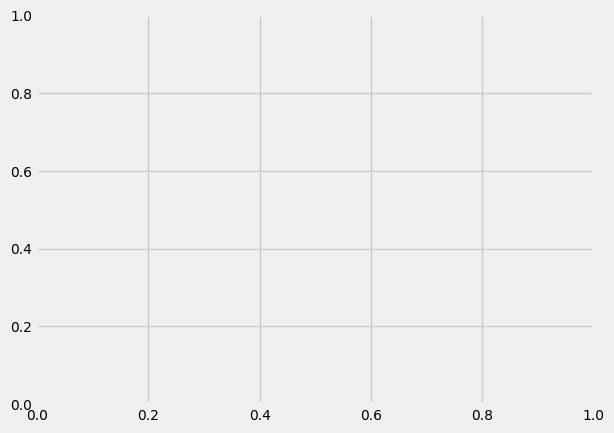

In [5]:
# Building the environment
env1 = Dataset_A_env()
np.random.seed(0)
num_actions = 10 #env.action_space.n

In [8]:
from stable_baselines3.common.env_checker import check_env
check_env(env=env1)

In [7]:
!pip install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.callbacks import BaseCallback
import pandas as pd

class MyCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(MyCallback, self).__init__(verbose)
        self.episode_rewards = []
        self.t = []

    def _on_step(self) -> bool:
        if len(self.model.ep_info_buffer)==0:
            return True
        # Log episode rewards during training
        self.episode_rewards.append(self.model.ep_info_buffer[-1]['r'])
        self.t.append(self.model.ep_info_buffer[0]['t'])
        self.model.episode_rewards = self.episode_rewards
        self.model.t = self.t
        return True  # continue training


In [10]:
import gymnasium as gym
import torch as th
import torch.nn as nn
import torch
import torch.nn.functional as F
from stable_baselines3 import DQN
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.dqn.policies import DQNPolicy
class CustomResNetFeaturesExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.spaces.Box, features_dim: int = 128):
        super(CustomResNetFeaturesExtractor, self).__init__(observation_space, features_dim)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1).to('cuda:0')#.to(torch.float64)
        self.pool = nn.MaxPool2d(2, 2).to(torch.float64).to('cuda:0')
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1).to('cuda:0')#.to(torch.float64)
        self.fc1 = nn.Linear(64 * 7 * 7, 128).to('cuda:0')#.to(torch.float64)
        self.dropout = nn.Dropout(0.5).to('cuda:0')#.to(torch.float64)
        # self.fc2 = nn.Linear(128, 28*28).to('cuda:0')#.to(torch.float64)

    def forward(self, x):
        x = x.reshape([-1,1,28,28])#.to(torch.float64)
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        # x = self.fc2(x)
        return x
        # return F.log_softmax(x, dim=1)

class CustomDQNPolicy(DQNPolicy):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

In [11]:
env = env1
obs_space = env.observation_space
# Define the policy_kwargs to use the features extractor
policy_kwargs = dict(
    features_extractor_class=CustomResNetFeaturesExtractor,
    features_extractor_kwargs=dict(features_dim=128),
    net_arch=[]
)

# Create the DQN model
model = DQN(
    policy=CustomDQNPolicy,
    env=env,
    policy_kwargs=policy_kwargs,
    verbose=1,
    buffer_size=10000,
    learning_rate=1e-4,
    batch_size=128*8,
    gamma=0.99,
    train_freq=4,
    gradient_steps=1,
    target_update_interval=1000,
)

callback = MyCallback()

# Train the model
model.learn(total_timesteps=100000, callback=callback)

# Save the model
model.save("test")

# Don't forget to close the environment
env.close()

Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0491   |
|    n_updates        | 24641    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1        |
|    ep_rew_mean      | 0.6      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 98672    |
|    fps              | 42       |
|    time_elapsed     | 2311     |
|    total_timesteps  | 98672    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0613   |
|    n_updates        | 24642    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1        |
|    ep_rew_mean      | 0.6      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 98676    |
|   

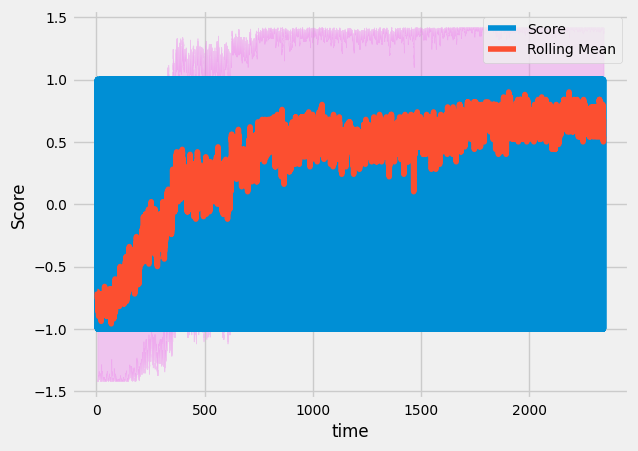

In [12]:
window = 100
reward_sum = model.episode_rewards
rolling_mean = pd.Series(reward_sum).rolling(window).mean()
std = pd.Series(reward_sum).rolling(window).std()

plt.plot(model.t, reward_sum)
plt.plot(model.t, rolling_mean)
plt.fill_between(model.t, rolling_mean-std, rolling_mean+std, color='violet', alpha=0.4)#range(len(reward_sum))

plt.grid('on')
plt.xlabel('time')#Episode
plt.ylabel('Score')
plt.legend(['Score', 'Rolling Mean'])

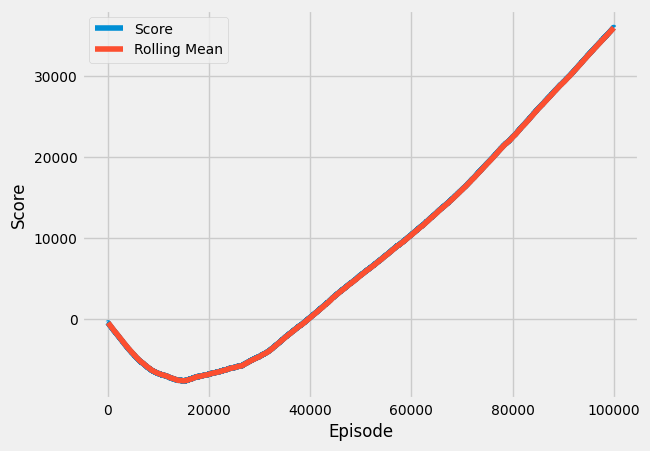

In [13]:
env1.render()

In [14]:
model = DQN.load("test", print_system_info=True)

== CURRENT SYSTEM INFO ==
- OS: Linux-6.1.85+-x86_64-with-glibc2.35 # 1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
- Python: 3.10.12
- Stable-Baselines3: 2.3.2
- PyTorch: 2.3.0+cu121
- GPU Enabled: True
- Numpy: 1.25.2
- Cloudpickle: 2.2.1
- Gymnasium: 0.29.1
- OpenAI Gym: 0.25.2

== SAVED MODEL SYSTEM INFO ==
- OS: Linux-6.1.85+-x86_64-with-glibc2.35 # 1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
- Python: 3.10.12
- Stable-Baselines3: 2.3.2
- PyTorch: 2.3.0+cu121
- GPU Enabled: True
- Numpy: 1.25.2
- Cloudpickle: 2.2.1
- Gymnasium: 0.29.1
- OpenAI Gym: 0.25.2



Transfer Learning

In [15]:
class CustomResNetFeaturesExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.spaces.Box, features_dim: int = 128):
        super(CustomResNetFeaturesExtractor, self).__init__(observation_space, features_dim)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1).to('cuda:0')#.to(torch.float64)
        self.pool = nn.MaxPool2d(2, 2).to(torch.float64).to('cuda:0')
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1).to('cuda:0')#.to(torch.float64)
        self.conv3 = nn.Conv2d(64, 32, kernel_size=3, padding=1).to('cuda:0')
        self.conv4 = nn.Conv2d(32, 64, kernel_size=3, padding=1).to('cuda:0')

        self.fc1 = nn.Linear(64 * 1 * 1, 128).to('cuda:0')#.to(torch.float64)#(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5).to('cuda:0')#.to(torch.float64)
        # self.fc2 = nn.Linear(128, 28*28).to('cuda:0')#.to(torch.float64)

    def forward(self, x):
        x = x.reshape([-1,1,28,28])#.to(torch.float64)

        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 1 * 1)# 64 * 7 * 7
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        # x = self.fc2(x)
        return x
        # return F.log_softmax(x, dim=1)

class CustomDQNPolicy(DQNPolicy):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0256   |
|    n_updates        | 24641    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1        |
|    ep_rew_mean      | 0.74     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 98672    |
|    fps              | 57       |
|    time_elapsed     | 1703     |
|    total_timesteps  | 98672    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0234   |
|    n_updates        | 24642    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1        |
|    ep_rew_mean      | 0.7      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 98676    |
|   

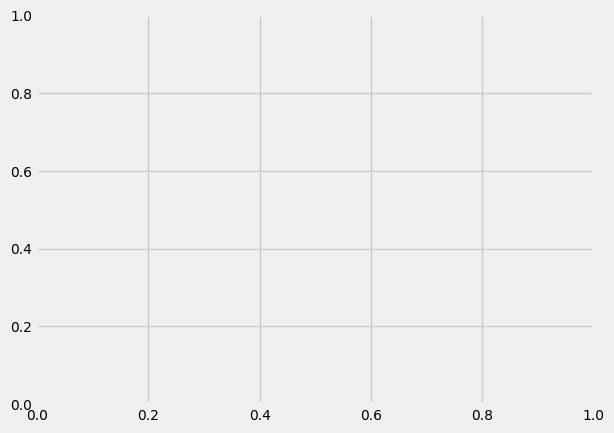

In [16]:
env = Dataset_A_env()
obs_space = env.observation_space

# Define the policy_kwargs to use the features extractor
policy_kwargs = dict(
    features_extractor_class=CustomResNetFeaturesExtractor,
    features_extractor_kwargs=dict(features_dim=128),
    net_arch=[]
)

# Create the DQN model
model2 = DQN(
    policy=CustomDQNPolicy,
    env=env,
    policy_kwargs=policy_kwargs,
    verbose=1,
    buffer_size=10000,
    learning_rate=1e-4,
    batch_size=128,
    gamma=0.99,
    train_freq=4,
    gradient_steps=1,
    target_update_interval=1000,
)
model2.policy.q_net.features_extractor.conv1 = model.policy.q_net.features_extractor.conv1
model2.policy.q_net.features_extractor.maxpool = model.policy.q_net.features_extractor.pool
model2.policy.q_net.features_extractor.conv2 = model.policy.q_net.features_extractor.conv2

model2.policy.q_net_target.features_extractor.conv1 = model.policy.q_net_target.features_extractor.conv1
model2.policy.q_net_target.features_extractor.maxpool = model.policy.q_net_target.features_extractor.pool
model2.policy.q_net_target.features_extractor.conv2 = model.policy.q_net_target.features_extractor.conv2


model2.policy.q_net.features_extractor.conv1.requires_grad = False
model2.policy.q_net.features_extractor.conv2.requires_grad = False
model2.policy.q_net.features_extractor.pool.requires_grad = False

model2.policy.q_net_target.features_extractor.conv1.requires_grad = False
model2.policy.q_net_target.features_extractor.conv2.requires_grad = False
model2.policy.q_net_target.features_extractor.pool.requires_grad = False

callback = MyCallback()

# Train the model
model2.learn(total_timesteps=100000, callback=callback)

# Save the model
model2.save("test2")

# Don't forget to close the environment
env.close()

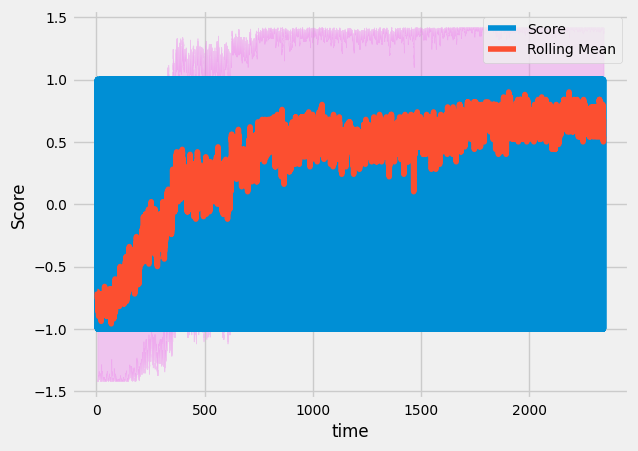

In [17]:
window = 100
reward_sum = model.episode_rewards
rolling_mean = pd.Series(reward_sum).rolling(window).mean()
std = pd.Series(reward_sum).rolling(window).std()

plt.plot(model.t, reward_sum)
plt.plot(model.t, rolling_mean)
plt.fill_between(model.t, rolling_mean-std, rolling_mean+std, color='violet', alpha=0.4)#range(len(reward_sum))

plt.grid('on')
plt.xlabel('time')#Episode
plt.ylabel('Score')
plt.legend(['Score', 'Rolling Mean'])

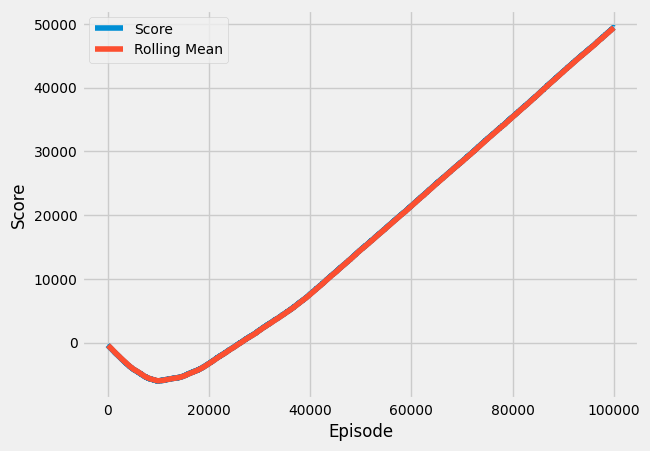

In [18]:
env.render()

In [19]:
model2 = DQN.load("test2", print_system_info=True)

== CURRENT SYSTEM INFO ==
- OS: Linux-6.1.85+-x86_64-with-glibc2.35 # 1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
- Python: 3.10.12
- Stable-Baselines3: 2.3.2
- PyTorch: 2.3.0+cu121
- GPU Enabled: True
- Numpy: 1.25.2
- Cloudpickle: 2.2.1
- Gymnasium: 0.29.1
- OpenAI Gym: 0.25.2

== SAVED MODEL SYSTEM INFO ==
- OS: Linux-6.1.85+-x86_64-with-glibc2.35 # 1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
- Python: 3.10.12
- Stable-Baselines3: 2.3.2
- PyTorch: 2.3.0+cu121
- GPU Enabled: True
- Numpy: 1.25.2
- Cloudpickle: 2.2.1
- Gymnasium: 0.29.1
- OpenAI Gym: 0.25.2



In [21]:
import scipy.io as sc
data2 = sc.loadmat('drive/MyDrive/rl/data2.mat')['data2']
DE = data2['DE'][0][0]
FE = data2['FE'][0][0]
label = data2['label'][0][0]

X = np.double(DE.reshape([-1, 784]))
Y = np.int64(label.reshape([-1, 784]).mean(1))

MAX = X.max()
MIN = X.min()
X = (X - MIN) / (MAX - MIN)

In [23]:
TrainData = np.load('drive/MyDrive/rl/TrainData.npy', allow_pickle = True).reshape([-1])[0]
X_train = TrainData['x']
Y_train = TrainData['y']

TestData = np.load('drive/MyDrive/rl/TestData.npy', allow_pickle = True).reshape([-1])[0]
X_test = TestData['x']
Y_test = TestData['y']

In [24]:
Y_hat_test = np.zeros(Y_test.shape)
for i in range(X_test.shape[0]):
    Y_hat_test[i] = model2.predict(X_test[i].reshape([1,-1]))[0][0]
Y_hat_train = np.zeros(Y_train.shape)
for i in range(X_train.shape[0]):
    Y_hat_train[i] = model2.predict(X_train[i].reshape([1,-1]))[0][0]

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
cm_train = confusion_matrix(Y_train, Y_hat_train)
cm_df_train = pd.DataFrame(cm_train)

cm_test = confusion_matrix(Y_test, Y_hat_test)
cm_df_test = pd.DataFrame(cm_test)

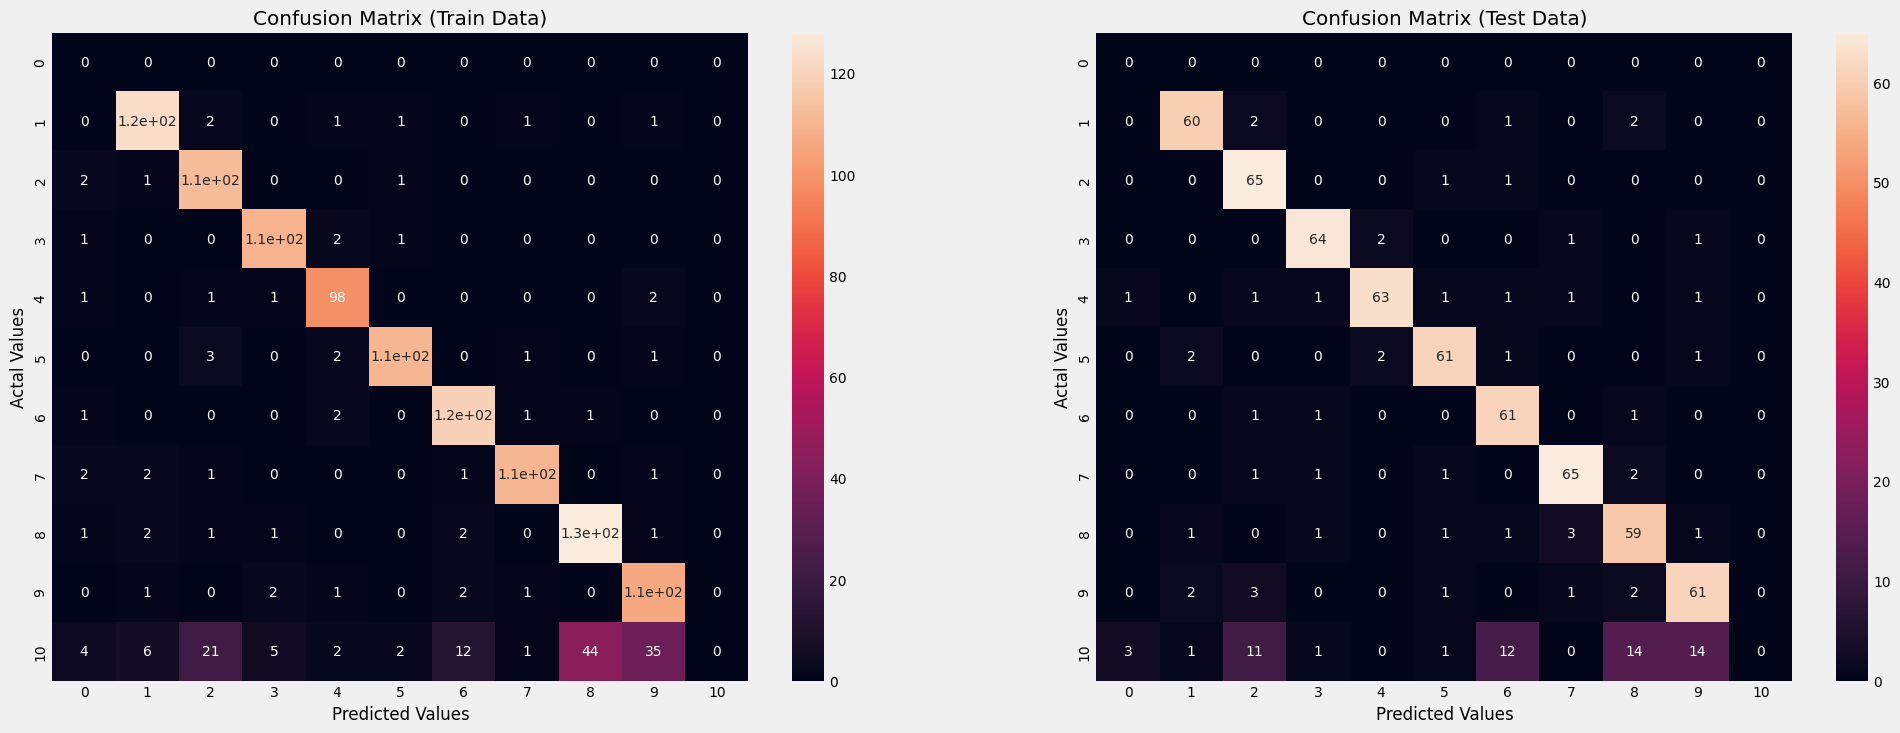

In [26]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.heatmap(cm_df_train, annot=True)
plt.title('Confusion Matrix (Train Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.subplot(1,2,2)
sns.heatmap(cm_df_test, annot=True)
plt.title('Confusion Matrix (Test Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig('ST3_results.png', dpi = 400)
plt.show()